In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from glob import glob
from os.path import join, abspath
from os import pardir
import sys
from scipy.stats import norm

In [4]:
root_dir = abspath(join(pardir, pardir))
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number/metal',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/Thesis-Project']

In [5]:
from utils import safe_mkdir

dir paths

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
twomass_dir = join(root_data_dir, "TMASS")
gaia_dir = join(root_data_dir, "Best-Pars")

completeness path

In [7]:
name = "Completeness"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Completeness already exist. Good to go!


twomass files path

In [8]:
twomass_files = glob(join(twomass_dir, "*.hdf5"))
twomass_files.sort()
twomass_files[:5]

['/home2/s20321005/Thesis-Project/Data/TMASS/tmass-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-004-005.hdf5']

add JK as color

In [9]:
tmass = vaex.open_many(twomass_files)
tmass["JK"] = tmass["Jmag"] - tmass["Kmag"]
tmass = tmass.extract()
tmass

#,designation,use_src,rd_flg,ra,dec,Jmag,Kmag,ph_qual,JK
0,00000036-0848119,1,222,0.001505,-8.803321,13.041,12.539,AAA,0.5020008
1,00000135-0828045,1,222,0.005649,-8.467934,13.285,12.946,AAA,0.33899975
2,00000182-0806237,1,222,0.007621,-8.106606,12.34,12.006,AAA,0.3340006
3,00000409-0854339,1,222,0.017071,-8.909436,13.434,12.841,AAA,0.5930004
4,00000432-0837071,1,222,0.018027,-8.618639,11.935,11.584,AAA,0.3510008
...,...,...,...,...,...,...,...,...,...
"50,250,394",23594291-7708495,1,222,359.928833,-77.14711,10.942,10.558,AAA,0.38400078
"50,250,395",23594324-7738278,1,212,359.93019,-77.64106,9.331,8.665,AAA,0.66600037
"50,250,396",23594896-7715221,1,222,359.954028,-77.256149,13.336,12.843,AAA,0.49300003
"50,250,397",23594907-7751479,1,222,359.954495,-77.863312,13.261,12.619,AAA,0.64199924


Let's see the heatmap count of twomass

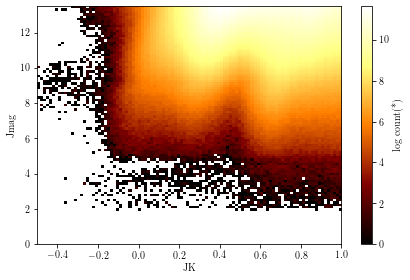

In [10]:
tmass.viz.heatmap("JK", "Jmag", shape=100, show=True, limits=[[-0.5, 1], [0, 13.5]], f='log')

filter out only for A quality

## Check at each color range

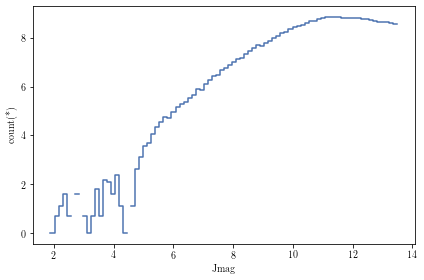

In [11]:
tmass_filt = tmass.filter("JK <0.1").filter("JK > 0")
tmass_filt = tmass_filt.extract()
tmass_filt.viz.histogram("Jmag", shape=100, show=True, limits=[0, 13.5], f='log')

looks nice to me!

# gaia

In [12]:
gaia_files = glob(join(gaia_dir, "gaia-*.hdf5"))
gaia_files.sort()
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

load gaia

In [13]:
gaia_raw = vaex.open_many(gaia_files)
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,00015786-8919312,1,222,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.0125999

In [14]:
mask = (gaia_raw["mh"].isnan()) & (gaia_raw["feh"].isnan())
gaia_filtered = gaia_raw[~mask]
gaia_filtered

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym
0,0.180498,-89.243835,13.123000144958496,12.678999900817871,AAA,4611967772579686144,18.71722984313965,17.611683049974353,0.017649758607149124,-6.337454890038764,0.018100611865520477,1.553482146463873,0.01645069755613804,14.506683349609375,14.941158294677734,13.901935577392578,927.3828125,1271.326416015625,0.9241908192634583,1.2207494974136353,303.11950730746855,-27.865822360149586,586.5784301757812,580.6773071289062,592.7108764648438,0.44209998846054077,0.4359000027179718,0.4494999945163727,nan,nan,nan,G,00004331-8914378,1,222,--,152.84475708007812,gaia,4.919384002685547,4.919384002685547,1.0,5675.6103515625,gspphot,11.37353515625,13.83251953125,0.0,4.49429988861084,gspphot,0.006199836730957031,0.004800319671630859,0.0,nan,--,nan,nan,nan,-0.5550000071525574,gspphot,0.016799986362457275,0.01639997959136963,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
1,0.338177,-89.481033,8.97700023651123,8.038000106811523,AAA,4611761957746621312,9.622093200683594,7.609580877064016,0.014360921457409859,-5.888883602727228,0.014550801366567612,0.8273958945757836,0.012673814781010151,11.280521392822266,12.197066307067871,10.340993881225586,1234.30517578125,3648.09716796875,1.0564011335372925,1.3118351697921753,303.05891462343493,-27.634759739425405,1171.7508544921875,1142.204345703125,1543.05419921875,0.8133999705314636,0.6207000017166138,0.8633999824523926,-0.12999999523162842,-0.2199999988079071,-0.029999999329447746,K,00012116-8928517,1,111,--,30.259687423706055,gaia,0.167822003364563,0.167822003364563,1.0,4251.74755859375,gspphot,142.98876953125,39.806640625,0.0,2.018699884414673,gspphot,0.2597998380661011,0.024700164794921875,0.0,nan,--,nan,nan,nan,0.11720000207424164,gspphot,0.006000004708766937,0.002799995243549347,0.0,-0.05000000074505806,gspspec,0.0,0.010000001639127731,0.0,nan,--,nan,nan,nan
2,0.392894,-89.286575,12.769000053405762,12.329999923706055,AAA,4611779756091083008,6.918576717376709,4.89813965086399,0.01557445153594017,-4.88619823091078,0.016693463549017906,1.4919122615226004,0.015075388364493847,14.183528900146484,14.626376152038574,13.570565223693848,865.9398193359375,1384.228271484375,1.063724160194397,1.2225970029830933,303.10597686099044,-27.824720661451884,625.9152221679688,620.0595703125,631.713623046875,0.5141000151634216,0.5109000205993652,0.5171999931335449,nan,nan,nan,G,00013429-8917116,1,222,--,8.28650951385498,gaia,6.514820575714111,6.514820575714111,1.0,5750.4326171875,gspphot,5.1650390625,4.8857421875,0.0,4.354100227355957,gspphot,0.006400108337402344,0.006499767303466797,0.0,nan,--,nan,nan,nan,-0.2969000041484833,gspphot,0.007499992847442627,0.006400018930435181,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan
3,0.491097,-89.325348,13.28499984741211,12.92199993133545,AAA,4611778656579457664,3.3354551792144775,2.758184654146036,0.015947440639138222,1.8755476312609647,0.01630321703851223,0.9132976622425212,0.014618651941418648,14.359504699707031,14.703383445739746,13.843310356140137,1021.37451171875,1692.3876953125,0.975788950920105,1.2055027484893799,303.09523730720935,-27.787137577515743,1043.23193359375,1028.8033447265625,1058.512939453125,0.3813000023365021,0.37709999084472656,0.3856000006198883,nan,nan,nan,F,00015786-8919312,1,222,--,-9.221250534057617,gaia,6.796242713928223,6.796242713928223,1.0,6268.86279296875,gspphot,7.986328125,8.31982421875,0.0,4.254300117492676,gspphot,0.0125999

In [15]:
gaia_filtered = gaia_filtered.extract()
mask_feh_mh = ~gaia_filtered["mh"].isnan() & ~gaia_filtered["feh"].isnan()
mask_feh = gaia_filtered["mh"].isnan() & ~gaia_filtered["feh"].isnan()
mask_mh =  ~gaia_filtered["mh"].isnan() & gaia_filtered["feh"].isnan()

feh_mh = gaia_filtered[mask_feh_mh]
feh_mh = feh_mh.extract()
feh_mh['metal'] = feh_mh['mh']

feh = gaia_filtered[mask_feh]
feh = feh.extract()
feh['metal'] = feh['feh']

mh = gaia_filtered[mask_mh]
mh = mh.extract()
mh['metal'] = mh['mh']

gaia = feh_mh.concat(feh)
gaia = gaia.concat(mh)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,metal
0,0.046157,-81.164528,10.732999801635742,10.067999839782715,AAA,4634205120372686848,8.192022323608398,8.110803742791548,0.012560209259390831,-1.1506896830570736,0.012741006910800934,0.5338372893236394,0.010035223327577114,12.24517822265625,12.768240928649902,11.563766479492188,1709.50341796875,2948.2890625,1.0225157737731934,1.2364193201065063,305.33660050359856,-35.723093021461544,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,00001107-8109523,1,222,--,31.66699981689453,galah,0.08100000023841858,0.08100000023841858,1.0,4893.51025390625,galah,88.40146441636993,88.40146441636993,1.0,2.409749984741211,galah,0.19407763228750083,0.19407763228750083,1.0,-0.4339942932128906,galah,0.06223889171267588,0.06223889171267588,1.0,-0.46000000834465027,gspspec,0.08000001311302185,0.09999999403953552,0.0,0.3575094148449802,galah,0.023899006297331042,0.023899006297331042,1.0,nan,--,nan,nan,nan,-0.46000000834465027
1,0.477038,-81.013222,11.402999877929688,10.954999923706055,AAA,4634210136894484480,4.951390743255615,-4.620418959400582,0.013004212640225887,1.779886940511068,0.011945684440433979,1.8447474978247307,0.009564868174493313,12.589227676391602,12.982416152954102,12.029059410095215,1451.3758544921875,2384.162109375,0.9575472474098206,1.210033893585205,305.301448386502,-35.88597388282727,537.4431762695312,534.75830078125,540.0507202148438,0.10249999910593033,0.09650000184774399,0.11079999804496765,nan,nan,nan,G,00015448-8100475,1,222,--,41.97700119018555,galah,0.13699999451637268,0.13699999451637268,1.0,5405.55517578125,gspphot,10.52734375,14.09912109375,0.0,4.142000198364258,gspphot,0.003200054168701172,0.0038995742797851562,0.0,0.16158008575439453,galah,0.06487528685986932,0.06487528685986932,1.0,-0.12710000574588776,gspphot,0.011799991130828857,0.014600008726119995,0.0,-0.004502628159000238,galah,0.03716119738791224,0.03716119738791224,1.0,nan,--,nan,nan,nan,-0.12710000574588776
2,0.014355,-80.592621,11.128999710083008,10.814000129699707,AAA,4634293351884119040,23.918516159057617,23.776528427320564,0.011432720348238945,-2.6023210494668874,0.011578823439776897,2.564327483887961,0.010080089792609215,12.19019603729248,12.522636413574219,11.690051078796387,1745.8253173828125,3775.23779296875,0.9391781091690063,1.2011629343032837,305.515275501027,-36.27646527198859,388.10198974609375,385.427490234375,423.8861999511719,0.1770000010728836,0.16859999299049377,0.19220000505447388,nan,nan,nan,F,00000344-8035334,1,222,--,18.39900016784668,galah,0.10700000077486038,0.10700000077486038,1.0,5916.7802734375,gspphot,15.82373046875,32.77685546875,0.0,4.216000080108643,gspphot,0.041699886322021484,0.009599685668945312,0.0,0.11013412475585938,galah,0.07313181466141985,0.07313181466141985,1.0,-0.14309999346733093,gspphot,0.017200008034706116,0.06769999116659164,0.0,-0.01929354493680184,galah,0.032751838550283276,0.032751838550283276,1.0,nan,--,nan,nan,nan,-0.14309999346733093
3,0.383232,-79.087845,12.28600025177002,11.940999984741211,AAA,4635419599685161984,6.002000331878662,5.432936939152479,0.013298854231834412,2.5509219951897077,0.0139350900426507,0.8280280939881076,0.010125162079930305,13.357067108154297,13.688793182373047,12.854592323303223,1590.122314453125,3100.5263671875,0.9660593271255493,1.2029478549957275,305.8967361229936,-37.75153438928266,1138.9039306640625,1127.12255859375,1153.23876953125,0.029500000178813934

In [16]:
gaia = gaia.filter("metal > -0.2").filter("metal < 0.2")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,metal
0,0.477038,-81.013222,11.402999877929688,10.954999923706055,AAA,4634210136894484480,4.951390743255615,-4.620418959400582,0.013004212640225887,1.779886940511068,0.011945684440433979,1.8447474978247307,0.009564868174493313,12.589227676391602,12.982416152954102,12.029059410095215,1451.3758544921875,2384.162109375,0.9575472474098206,1.210033893585205,305.301448386502,-35.88597388282727,537.4431762695312,534.75830078125,540.0507202148438,0.10249999910593033,0.09650000184774399,0.11079999804496765,nan,nan,nan,G,00015448-8100475,1,222,--,41.97700119018555,galah,0.13699999451637268,0.13699999451637268,1.0,5405.55517578125,gspphot,10.52734375,14.09912109375,0.0,4.142000198364258,gspphot,0.003200054168701172,0.0038995742797851562,0.0,0.16158008575439453,galah,0.06487528685986932,0.06487528685986932,1.0,-0.12710000574588776,gspphot,0.011799991130828857,0.014600008726119995,0.0,-0.004502628159000238,galah,0.03716119738791224,0.03716119738791224,1.0,nan,--,nan,nan,nan,-0.12710000574588776
1,0.014355,-80.592621,11.128999710083008,10.814000129699707,AAA,4634293351884119040,23.918516159057617,23.776528427320564,0.011432720348238945,-2.6023210494668874,0.011578823439776897,2.564327483887961,0.010080089792609215,12.19019603729248,12.522636413574219,11.690051078796387,1745.8253173828125,3775.23779296875,0.9391781091690063,1.2011629343032837,305.515275501027,-36.27646527198859,388.10198974609375,385.427490234375,423.8861999511719,0.1770000010728836,0.16859999299049377,0.19220000505447388,nan,nan,nan,F,00000344-8035334,1,222,--,18.39900016784668,galah,0.10700000077486038,0.10700000077486038,1.0,5916.7802734375,gspphot,15.82373046875,32.77685546875,0.0,4.216000080108643,gspphot,0.041699886322021484,0.009599685668945312,0.0,0.11013412475585938,galah,0.07313181466141985,0.07313181466141985,1.0,-0.14309999346733093,gspphot,0.017200008034706116,0.06769999116659164,0.0,-0.01929354493680184,galah,0.032751838550283276,0.032751838550283276,1.0,nan,--,nan,nan,nan,-0.14309999346733093
2,0.896803,-79.718262,12.491999626159668,12.076000213623047,AAA,4634580328715588608,8.354964256286621,7.787335087094225,0.017368797212839127,3.0270192805131866,0.014917412772774696,1.3466165042798284,0.012832468375563622,13.673371315002441,14.075549125671387,13.110024452209473,1366.2677001953125,1736.4844970703125,1.0855536460876465,1.2079379558563232,305.59265660574226,-37.16158455309995,722.0944213867188,716.0371704101562,728.3154296875,0.01759999990463257,0.011099999770522118,0.02449999935925007,nan,nan,nan,G,00033523-7943057,1,222,--,-0.2029999941587448,galah,0.12999999523162842,0.12999999523162842,1.0,5345.99755859375,gspphot,13.1845703125,13.62646484375,0.0,4.242300033569336,gspphot,0.0048999786376953125,0.004799842834472656,0.0,0.24565553665161133,galah,0.11173560606010935,0.11173560606010935,1.0,-0.18219999969005585,gspphot,0.012299999594688416,0.012199997901916504,0.0,0.01618132352912524,galah,0.06396452752376534,0.06396452752376534,1.0,nan,--,nan,nan,nan,-0.18219999969005585
3,0.929224,-77.290833,11.119999885559082,10.843999862670898,AAA,4684032199907919744,5.028616905212402,4.965782565671377,0.011546516790986061,0.7924585522985491,0.013034594245254993,1.224291023323134,0.010492397472262383,12.116311073303223,12.411081314086914,11.654296875,1580.6107177734375,2760.918212890625,1.1043803691864014,1.1969870328903198,306.311928860

let's see the sky distribution using healpix.

Gaia data have special column called `source_id` which can be transformed into healpix index. Let's see the distribution of the data.

In [17]:
import healpy as hp

level = 6
factor = 34359738368 * (4**(12-level))
nmax = hp.nside2npix(2**level)
epsilon = 1e-16
counts = gaia.count(binby=gaia.source_id/factor, limits=[-epsilon, nmax-epsilon], shape=nmax)
counts

array([ 51,  55,  58, ..., 143, 132, 127])

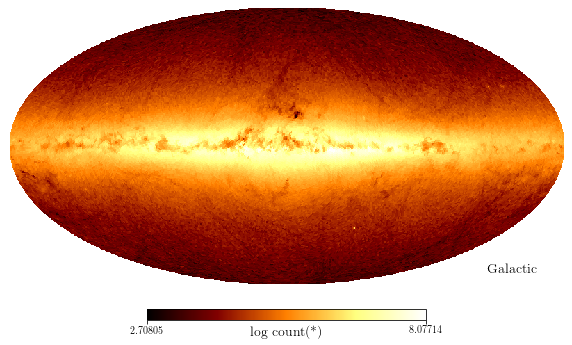

In [18]:
gaia.viz.healpix_heatmap(
    f="log",
    healpix_level=6,
    figsize=(10,8),
    healpix_output="galactic"
)

add color JK

In [19]:
gaia['JK'] = gaia['Jmag'] - gaia['Kmag']
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,metal,JK
0,0.477038,-81.013222,11.402999877929688,10.954999923706055,AAA,4634210136894484480,4.951390743255615,-4.620418959400582,0.013004212640225887,1.779886940511068,0.011945684440433979,1.8447474978247307,0.009564868174493313,12.589227676391602,12.982416152954102,12.029059410095215,1451.3758544921875,2384.162109375,0.9575472474098206,1.210033893585205,305.301448386502,-35.88597388282727,537.4431762695312,534.75830078125,540.0507202148438,0.10249999910593033,0.09650000184774399,0.11079999804496765,nan,nan,nan,G,00015448-8100475,1,222,--,41.97700119018555,galah,0.13699999451637268,0.13699999451637268,1.0,5405.55517578125,gspphot,10.52734375,14.09912109375,0.0,4.142000198364258,gspphot,0.003200054168701172,0.0038995742797851562,0.0,0.16158008575439453,galah,0.06487528685986932,0.06487528685986932,1.0,-0.12710000574588776,gspphot,0.011799991130828857,0.014600008726119995,0.0,-0.004502628159000238,galah,0.03716119738791224,0.03716119738791224,1.0,nan,--,nan,nan,nan,-0.12710000574588776,0.4479999542236328
1,0.014355,-80.592621,11.128999710083008,10.814000129699707,AAA,4634293351884119040,23.918516159057617,23.776528427320564,0.011432720348238945,-2.6023210494668874,0.011578823439776897,2.564327483887961,0.010080089792609215,12.19019603729248,12.522636413574219,11.690051078796387,1745.8253173828125,3775.23779296875,0.9391781091690063,1.2011629343032837,305.515275501027,-36.27646527198859,388.10198974609375,385.427490234375,423.8861999511719,0.1770000010728836,0.16859999299049377,0.19220000505447388,nan,nan,nan,F,00000344-8035334,1,222,--,18.39900016784668,galah,0.10700000077486038,0.10700000077486038,1.0,5916.7802734375,gspphot,15.82373046875,32.77685546875,0.0,4.216000080108643,gspphot,0.041699886322021484,0.009599685668945312,0.0,0.11013412475585938,galah,0.07313181466141985,0.07313181466141985,1.0,-0.14309999346733093,gspphot,0.017200008034706116,0.06769999116659164,0.0,-0.01929354493680184,galah,0.032751838550283276,0.032751838550283276,1.0,nan,--,nan,nan,nan,-0.14309999346733093,0.3149995803833008
2,0.896803,-79.718262,12.491999626159668,12.076000213623047,AAA,4634580328715588608,8.354964256286621,7.787335087094225,0.017368797212839127,3.0270192805131866,0.014917412772774696,1.3466165042798284,0.012832468375563622,13.673371315002441,14.075549125671387,13.110024452209473,1366.2677001953125,1736.4844970703125,1.0855536460876465,1.2079379558563232,305.59265660574226,-37.16158455309995,722.0944213867188,716.0371704101562,728.3154296875,0.01759999990463257,0.011099999770522118,0.02449999935925007,nan,nan,nan,G,00033523-7943057,1,222,--,-0.2029999941587448,galah,0.12999999523162842,0.12999999523162842,1.0,5345.99755859375,gspphot,13.1845703125,13.62646484375,0.0,4.242300033569336,gspphot,0.0048999786376953125,0.004799842834472656,0.0,0.24565553665161133,galah,0.11173560606010935,0.11173560606010935,1.0,-0.18219999969005585,gspphot,0.012299999594688416,0.012199997901916504,0.0,0.01618132352912524,galah,0.06396452752376534,0.06396452752376534,1.0,nan,--,nan,nan,nan,-0.18219999969005585,0.4159994125366211
3,0.929224,-77.290833,11.119999885559082,10.843999862670898,AAA,4684032199907919744,5.028616905212402,4.965782565671377,0.011546516790986061,0.7924585522985491,0.013034594245254993,1.224291023323134,0.010492397472262383,12.116311073303223,12.411081314086914,11.654296875,1580.6107177734375,2760.9182

and the heatmap

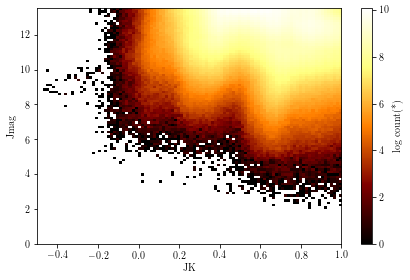

In [20]:
gaia.viz.heatmap("JK", "Jmag", shape=100, show=True, limits=[[-0.5, 1], [0, 13.5]], f='log')

looks similar to 2MASS.

Let's compare them!

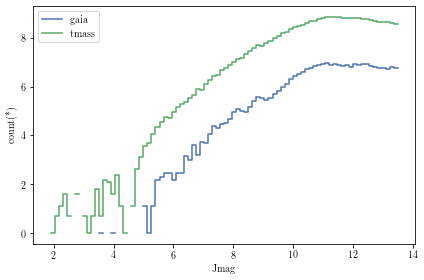

In [21]:
gaia_filt = gaia.filter("JK <0.1").filter("JK > 0")
gaia_filt = gaia_filt.extract()
gaia_filt.viz.histogram("Jmag", shape=100, label="gaia", limits=[0, 13.5], f='log')
tmass_filt.viz.histogram("Jmag", shape=100, label="tmass", limits=[0, 13.5], f='log')
plt.legend()

# Let's do some math

We are going to fit them for each color range.

In [22]:
gaia_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,metal,JK
0,1.104298,73.738899,10.40999984741211,10.322999954223633,AAA,537975513167830656,9.41399097442627,-9.261388552145661,0.01343628205358982,-1.688164915636838,0.016070730984210968,1.9443720056339808,0.013109274208545685,11.23129940032959,11.468207359313965,10.848592758178711,2256.341552734375,3848.64453125,0.9059938788414001,1.1818684339523315,119.59825441681379,11.172232363468432,518.4055786132812,509.0863037109375,545.77197265625,0.7892000079154968,0.7760999798774719,0.8019000291824341,nan,nan,nan,A,00042503+7344200,1,222,--,-23.84494972229004,apogee,0.08493119478225708,0.08493119478225708,1.0,8093.2509765625,gspphot,41.267578125,39.818359375,0.0,3.7738258838653564,apogee,0.02428031526505947,0.02428031526505947,1.0,-0.006757698953151703,apogee,0.004949461668729782,0.004949461668729782,1.0,0.009999999776482582,gspspec,0.029999999329447746,0.06999999843537807,0.0,0.18000000715255737,gspspec,0.08000000566244125,0.15000000596046448,0.0,-0.1736947000026703,apogee,0.010798830538988113,0.010798830538988113,1.0,0.009999999776482582,0.08699989318847656
1,5.535041,66.460815,7.118000030517578,7.031000137329102,AAA,528234974018528896,28.243337631225586,27.697323923932572,0.020128626376390457,-5.5266995210945895,0.020620813593268394,4.050736866622351,0.01957244984805584,7.72032356262207,7.871587753295898,7.438978672027588,2422.98388671875,3001.55126953125,1.0141675472259521,1.1763485670089722,120.00728312967257,3.755556386472898,255.1800994873047,253.53140258789062,257.9356994628906,0.09470000118017197,0.04699999839067459,0.12999999523162842,nan,nan,nan,A,00220840+6627389,1,111,--,6.200112819671631,apogee,0.051668424159288406,0.051668424159288406,1.0,6738.701171875,apogee,54.84394454956055,54.84394454956055,1.0,3.522599935531616,gspphot,0.01269984245300293,0.008800029754638672,0.0,0.08997499942779541,apogee,0.0041237687692046165,0.0041237687692046165,1.0,0.023399999365210533,gspphot,0.0027999989688396454,0.0037000011652708054,0.0,0.07999999821186066,gspspec,0.0,0.01000000536441803,0.0,-0.14778469502925873,apogee,0.010230817832052708,0.010230817832052708,1.0,0.023399999365210533,0.08699989318847656
2,21.144619,14.689357,9.336000442504883,9.243000030517578,AAA,2590562133636937088,21.652589797973633,-12.882910750813052,0.029125455766916275,-17.403024916948095,0.016116410493850708,2.8728351277332225,0.02128571644425392,9.937211036682129,9.980871200561523,9.639130592346191,634.174072265625,593.3943481445312,1.0363080501556396,1.2505518198013306,134.8195408853376,-47.41616316538588,357.7392883300781,354.2471008300781,361.1365051269531,0.8324000239372253,0.8269000053405762,0.8409000039100647,nan,nan,nan,B,01243470+1441216,1,222,--,-1.1046689748764038,apogee,0.07577124238014221,0.07577124238014221,1.0,6659.31689453125,apogee,57.96101379394531,57.96101379394531,1.0,4.435100078582764,gspphot,0.011400222778320312,0.011700153350830078,0.0,0.03403899818658829,apogee,0.005073500331491232,0.005073500331491232,1.0,-0.11343999952077866,apogee,0.008322739973664284,0.008322739973664284,1.0,nan,--,nan,nan,nan,-0.15769469738006592,apogee,0.01157369278371334,0.01157369278371334,1.0,-0.11343999952077866,0.09300041198730469
3,25.216619,45.578461,13.232999801635742,13.145999908447266,AAA,350608526951861760,3.7274434566497803,-2.9402608438145195,0.01679006591439247,-2.291004254998821,0.01422931719571352,0.5678583618010271,

In [36]:
# gaia_J = gaia_filt.Jmag.to_numpy()
# tmass_J = tmass_filt.Jmag.to_numpy()

# np.histogram(gaia_J, bins=100, range=(0, 13.5))

In [42]:
# p = 2.8
# jk_s_stretch = np.linspace(0, 0.5**p, 13)
# jks = np.power(jk_s_stretch, 1/p)-0.1
# jk_bound = [np.round(jk,2) for jk in zip(jks[:-1], jks[1:])]
# jk_bound

In [23]:
jk_bound = [[-0.004, 0.14100000000000001], [0.14100000000000001, 0.329], [0.329, 0.373]]
jk_bound

[[-0.004, 0.14100000000000001], [0.14100000000000001, 0.329], [0.329, 0.373]]

-0.004 0.14100000000000001


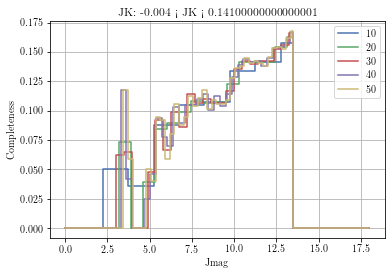

0.14100000000000001 0.329


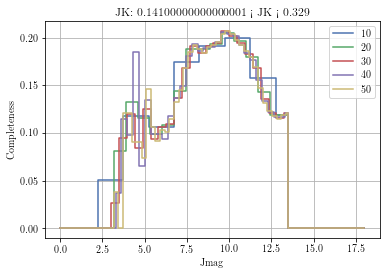

0.329 0.373


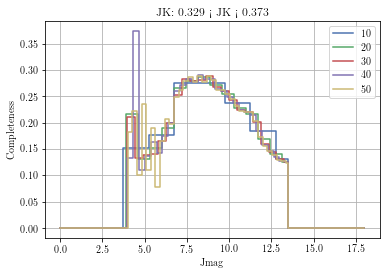

In [24]:
from tqdm import tqdm

for jk_low, jk_high in jk_bound:
    print(jk_low, jk_high)
    tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    tmass_filt = tmass_filt.extract()
    tmass_J = tmass_filt.Jmag.to_numpy()
    gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    gaia_filt = gaia_filt.extract()
    gaia_J = gaia_filt.Jmag.to_numpy()
    plt.figure(figsize=(6,4))
    for N in range(10, 51, 10):
        # gaia_H = gaia_filt.count(binby=gaia_filt.Jmag, limits=[0, 13.5], shape=N)
        # tmass_H = tmass_filt.count(binby=tmass_filt.Jmag, limits=[0, 13.5], shape=N)
        gaia_H = np.histogram(gaia_J, bins=N, range=(0, 13.5))[0]
        tmass_H = np.histogram(tmass_J, bins=N, range=(0, 13.5))[0]
        Js = np.linspace(0, 13.5, N)
        extend = np.linspace(13.5, 18, 20)
        Js = np.append(Js, extend)
        mask = tmass_H==0
        tmass_H[mask] = 1
        gaia_H[mask] = 0
        frac = gaia_H/tmass_H
        frac = np.append(frac, np.zeros_like(extend))
        plt.plot(Js, frac, drawstyle="steps-mid", label=N)
    plt.legend()
    plt.title(f"JK: {jk_low} < JK < {jk_high}")
    plt.xlabel("Jmag")
    plt.ylabel("Completeness")
    plt.grid()
    plt.show()
    # break

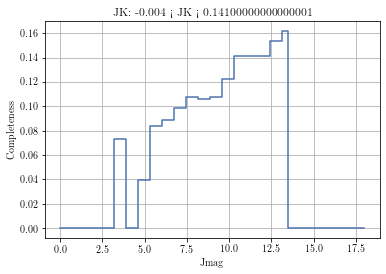

In [26]:
# ex
jk_low, jk_high = jk_bound[0]
tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
tmass_filt = tmass_filt.extract()
tmass_J = tmass_filt.Jmag.to_numpy()
gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
gaia_filt = gaia_filt.extract()
gaia_J = gaia_filt.Jmag.to_numpy()

gaia_H = np.histogram(gaia_J, bins=20, range=(0, 13.5))[0]
tmass_H = np.histogram(tmass_J, bins=20, range=(0, 13.5))[0]
Js = np.linspace(0, 13.5, 20)
extend = np.linspace(13.5, 18, 20)
Js = np.append(Js, extend)
tmass_H[tmass_H==0] = 1
gaia_H[tmass_H==0] = 0
frac = gaia_H/tmass_H
ydata = np.append(frac, np.zeros_like(extend))
xdata = Js

plt.plot(xdata, ydata, drawstyle="steps-mid")
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.show()

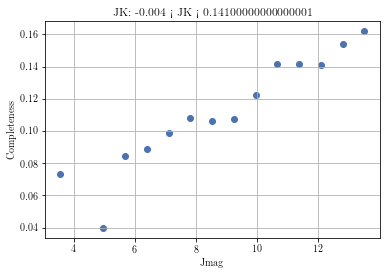

In [27]:
mask = (ydata != 0)
xd = xdata[mask]
yd = ydata[mask]

# plot
plt.scatter(xd, yd)
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.show()

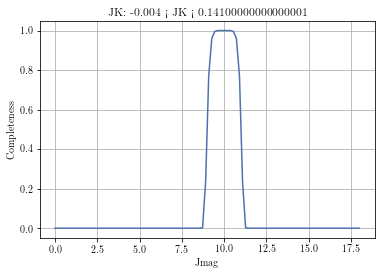

In [28]:
def window(x, x0, w, n):
    return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2

# plot
x = np.linspace(0, 18, 100)
plt.plot(x, window(x, 10, 1, 4))
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.show()


[-3.61822486e-05  1.61960143e-03 -2.79324501e-02  2.30459501e-01
 -8.91293609e-01  1.34341723e+00]


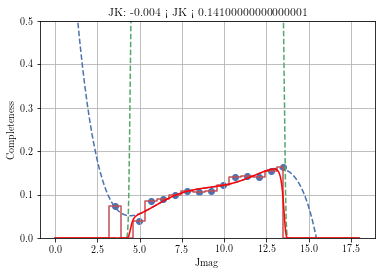

In [29]:
# polyfit
p = np.polyfit(xd, yd, 5)
print(p)
# evaluate
x = np.linspace(0, 18, 500)
y = np.polyval(p, x)
yw = window(x, 9, 4.5, 18)
# plot
plt.scatter(xd, yd)
plt.plot(x, y, ls="--")
plt.title(f"JK: {jk_low} < JK < {jk_high}")
plt.plot(x, yw, ls="--")
plt.plot(xdata, ydata, drawstyle="steps-mid")
plt.plot(x, yw*y, c="r")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,0.5)
plt.show()

[8.29376167 5.19631934]


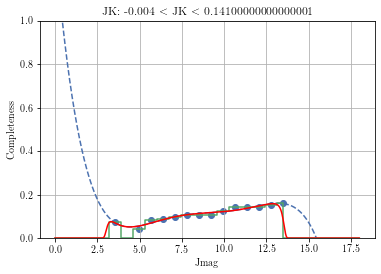

In [32]:
from scipy.optimize import curve_fit

x = np.linspace(0, 18, 500)
y = np.polyval(p, x)

p = np.polyfit(xd, yd, 5)
def comp_func(x, x0, w):
    return window(x, x0, w, 18)*np.polyval(p, x)

popt, pcov = curve_fit(comp_func, xdata, ydata, p0=[9, 5])
print(popt)
plt.scatter(xd, yd)
plt.plot(x, y, ls="--")
plt.title(f"JK: {jk_low} $<$ JK $<$ {jk_high}")
plt.plot(xdata, ydata, drawstyle="steps-mid")
plt.plot(x, comp_func(x, *popt), c="r")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()

-0.004 0.14100000000000001
filter 2mass: 0.53 s
filter gaia: 4.99 s
count gaia: 0.00 s
count 2mass: 0.00 s
[8.28083209 5.20308069]


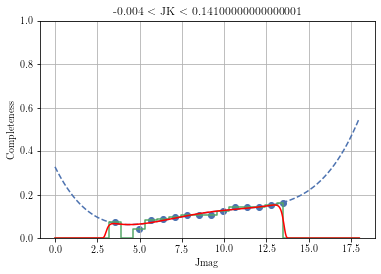

0.14100000000000001 0.329
filter 2mass: 0.53 s
filter gaia: 4.60 s
count gaia: 0.01 s
count 2mass: 0.04 s
[8.47537281 5.03118723]


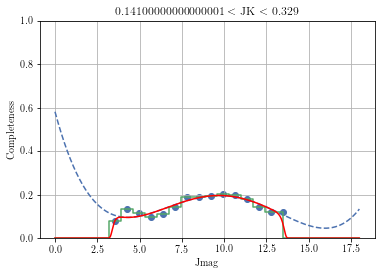

0.329 0.373
filter 2mass: 1.04 s
filter gaia: 7.69 s
count gaia: 0.01 s
count 2mass: 0.02 s
[8.62814577 4.84745853]


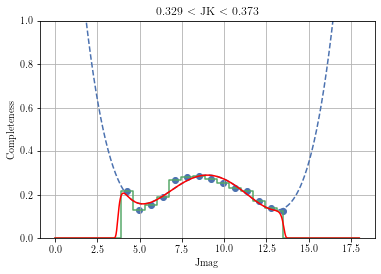

In [33]:
from time import time

# p = 2.8
# jk_s_stretch = np.linspace(0, 0.5**p, 13)
# jk_s = np.power(jk_s_stretch, 1/p)-0.1
# jk_bound = [np.round(jk,2) for jk in zip(jk_s[:-1], jk_s[1:])]

pol = []
popts = []

N = 20

for jk_low, jk_high in jk_bound:
    t0 = time()
    print(jk_low, jk_high)
    tmass_filt = tmass.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    tmass_filt = tmass_filt.extract()
    tmass_J = tmass_filt.Jmag.to_numpy()
    t1 = time()
    print(f"filter 2mass: {t1-t0:.2f} s")
    gaia_filt = gaia.filter(f"JK <{jk_high}").filter(f"JK > {jk_low}")
    gaia_filt = gaia_filt.extract()
    gaia_J = gaia_filt.Jmag.to_numpy()
    t2 = time()
    print(f"filter gaia: {t2-t1:.2f} s")
    # gaia_H = gaia_filt.count(binby=gaia_filt.Jmag, limits=[0, 13.5], shape=N)
    gaia_H = np.histogram(gaia_J, bins=N, range=[0, 13.5])[0]
    t3 = time()
    print(f"count gaia: {t3-t2:.2f} s")
    # tmass_H = tmass_filt.count(binby=tmass_filt.Jmag, limits=[0, 13.5], shape=N)
    tmass_H = np.histogram(tmass_J, bins=N, range=[0, 13.5])[0]
    t4 = time()
    print(f"count 2mass: {t4-t3:.2f} s")
    Js = np.linspace(0, 13.5, N)
    extend = np.linspace(13.5, 18, 20)
    Js = np.append(Js, extend)
    tmass_H[tmass_H==0] = 1
    gaia_H[tmass_H==0] = 0
    frac = gaia_H/tmass_H
    ydata = np.append(frac, np.zeros_like(extend))
    xdata = Js

    mask = (ydata != 0)
    xd = xdata[mask]
    yd = ydata[mask]

    p = np.polyfit(xd, yd, 4)
    pol.append(p)

    x = np.linspace(0, 18, 500)
    y = np.polyval(p, x)

    def comp_func(x, x0, w):
        return window(x, x0, w, 18)*np.polyval(p, x)

    popt, pcov = curve_fit(comp_func, xdata, ydata, p0=[9, 5])
    popts.append(popt)
    print(popt)
    plt.scatter(xd, yd)
    plt.plot(x, y, ls="--")
    plt.title(f"{jk_low} $<$ JK $<$ {jk_high}")
    plt.plot(xdata, ydata, drawstyle="steps-mid")
    plt.plot(x, comp_func(x, *popt), c="r")
    plt.xlabel("Jmag")
    plt.ylabel("Completeness")
    plt.grid()
    plt.ylim(0,1)
    plt.show()
    # break

In [34]:
len(jk_bound)

3

In [35]:
def comf(x, x0, w, p):
    return window(x, x0, w, 18)*np.polyval(p, x)

df_args = []

for (jk_low, jk_high), p, popt in zip(jk_bound, pol, popts):
    args_dict = {"x0": [popt[0]], "w": [popt[1]], 
    "p1": [p[0]], "p2": [p[1]], "p3": [p[2]], "p4": [p[3]], "p5": [p[4]], "jk_low": [jk_low], "jk_high": [jk_high]}
    if len(df_args) == 0:
        df_args = vaex.from_dict(args_dict)
    else:
        df_args = df_args.concat(vaex.from_dict(args_dict))
df_args

#,x0,w,p1,p2,p3,p4,p5,jk_low,jk_high
0,8.28083,5.20308,6.93438e-05,-0.00247819,0.0315662,-0.157195,0.32774,-0.004,0.141
1,8.47537,5.03119,0.000107697,-0.00430638,0.0572431,-0.288055,0.580966,0.141,0.329
2,8.62815,4.84746,0.000603048,-0.0219495,0.280816,-1.47931,2.90189,0.329,0.373


In [36]:
df_args.export(join(data_dir, "coefficients-metal.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.07s =  0.0m =  0.0h
 

# LOAD COEFFs

In [36]:
df_args = vaex.open(join(data_dir, "coefficients.hdf5"))
df_args = df_args.to_pandas_df()
df_args

,x0,w,p1,p2,p3,p4,p5,jk_low,jk_high
0,8.990561,4.496171,0.000190,-0.007254,0.101081,-0.580517,1.857026,-0.100000,0.105849
1,9.065392,4.423229,-0.000443,0.017857,-0.259312,1.631051,-3.063510,0.105849,0.163669
2,8.987810,4.498361,0.000463,-0.017717,0.250324,-1.518382,3.990781,0.163669,0.204753
3,8.988754,4.497908,0.000331,-0.012625,0.179119,-1.100022,3.156862,0.204753,0.237730
4,8.992314,4.495201,0.000075,-0.002699,0.038334,-0.233036,1.201169,0.237730,0.265747
5,8.996226,4.491880,-0.000252,0.010350,-0.153137,0.990869,-1.684850,0.265747,0.290355
6,8.985875,4.500474,0.000276,-0.010343,0.143215,-0.840562,2.414612,0.290355,0.312448
7,9.106408,4.383563,-0.000727,0.028880,-0.415965,2.591681,-5.212375,0.312448,0.332594
8,8.993611,4.493266,0.000202,-0.007725,0.112462,-0.713262,2.325498,0.332594,0.351179
9,8.632438,4.849602,0.000954,-0.035843,0.492844,-2.906116,6.834013,0.351179,0.368480


reconstruct

<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


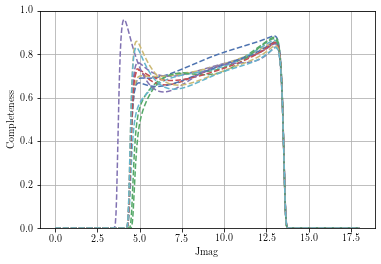

In [38]:
x = np.linspace(0, 18, 500)

# iterate over rows with iterrows
for index, row in df_args.iterrows():
    x0 = row.x0
    w = row.w
    p = [row.p1, row.p2, row.p3, row.p4, row.p5]
    y = comf(x, x0, w, p)
    plt.plot(x, y, ls="--", )
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()


create a function that take `j` mag and color `jk`, return it's completeness.

<ipython-input-26-3e36859e15c7>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(((x-x0)/w)**(2*n)))*2


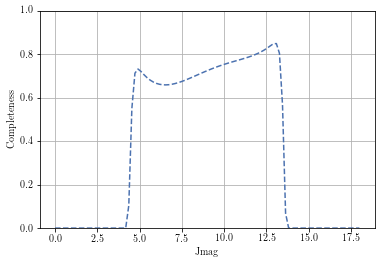

In [39]:
jk_lows = df_args.jk_low.values
jk_highs = df_args.jk_high.values
x0s = df_args.x0.values
x0s = np.append(x0s, 0)
ws = df_args.w.values
ws = np.append(ws, 1)
ps = df_args[["p1", "p2", "p3", "p4", "p5"]].values
ps = np.append(ps, np.zeros((len(ps), 5)), axis=0)

def polyv(p, j):
    print(p.shape)
    print(j.shape)
    return np.polyval(p, j)

def compjk(j, jk):
    index = np.searchsorted(jk_highs, jk)
    x0 = x0s[index]
    w = ws[index]
    p = ps[index]
    polifit_v = np.array([np.polyval(pi, ji) for pi, ji in zip(p, j)])
    return np.select([jk > 0.4, jk < -0.1], [0, 0], default=window(j, x0, w, 18)*polifit_v)

js = np.linspace(0, 18, 100)
jks = np.ones_like(js)*0.2

plt.plot(js, compjk(js, jks), ls="--")
plt.xlabel("Jmag")
plt.ylabel("Completeness")
plt.grid()
plt.ylim(0,1)
plt.show()
